In [3]:
!wget https://raw.githubusercontent.com/AJV009/Machine_Learning_NB/master/datasets/industry_energy/energy_train.csv
!wget https://raw.githubusercontent.com/AJV009/Machine_Learning_NB/master/datasets/industry_energy/energy_test.csv

--2020-05-01 10:53:21--  https://raw.githubusercontent.com/AJV009/Machine_Learning_NB/master/datasets/industry_energy/energy_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4375067 (4.2M) [text/plain]
Saving to: ‘energy_train.csv’

energy_train.csv    100%[===================>]   4.17M  --.-KB/s    in 0.1s    

2020-05-01 10:53:21 (41.5 MB/s) - ‘energy_train.csv’ saved [4375067/4375067]

--2020-05-01 10:53:24--  https://raw.githubusercontent.com/AJV009/Machine_Learning_NB/master/datasets/industry_energy/energy_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent,

In [0]:
import pandas as pd
df = pd.read_csv('energy_train.csv')
test_df = pd.read_csv('energy_test.csv')

df = df.fillna(df.mean())
test_df = test_df.fillna(test_df.mean())

In [0]:
tdf = df[['date','WattHour']]
tedf = test_df[['date']]

In [6]:
tdf['date'] = pd.to_datetime(tdf['date'])
tedf['date'] = pd.to_datetime(tedf['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
tdf.columns = ['ds','y']
tedf.columns = ['ds']

In [8]:
tdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,15000.0,98.751333,106.421877,10.0,50.0,60.0,100.0,1080.0


In [9]:
from fbprophet import Prophet

fbp = Prophet()
fbp.fit(tdf)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [0]:
forecast = fbp.predict(tedf)

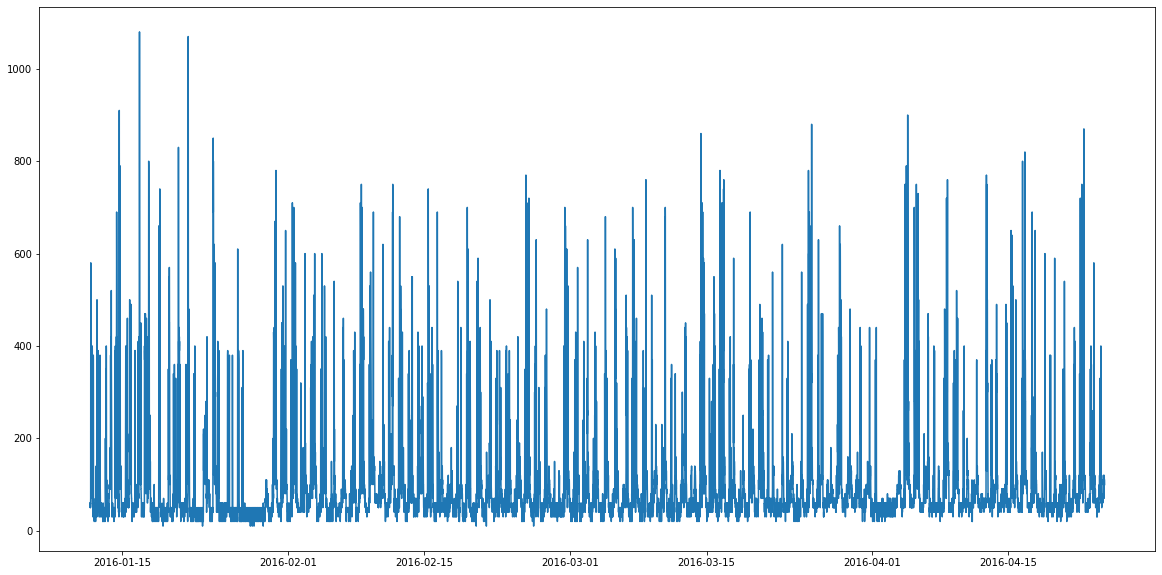

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(tdf['ds'],tdf['y'])

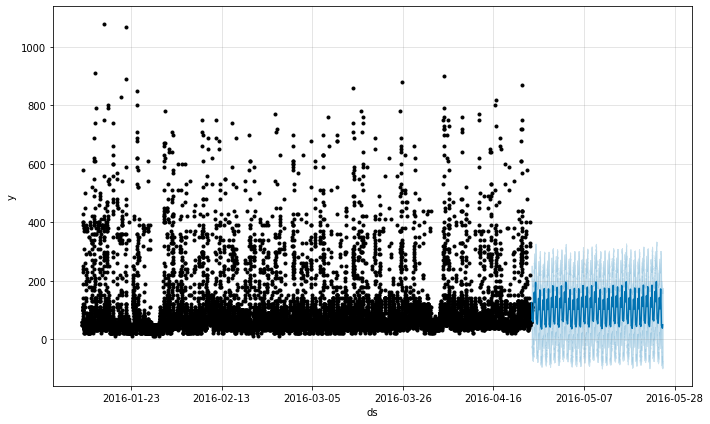

In [12]:
fig1 = fbp.plot(forecast)

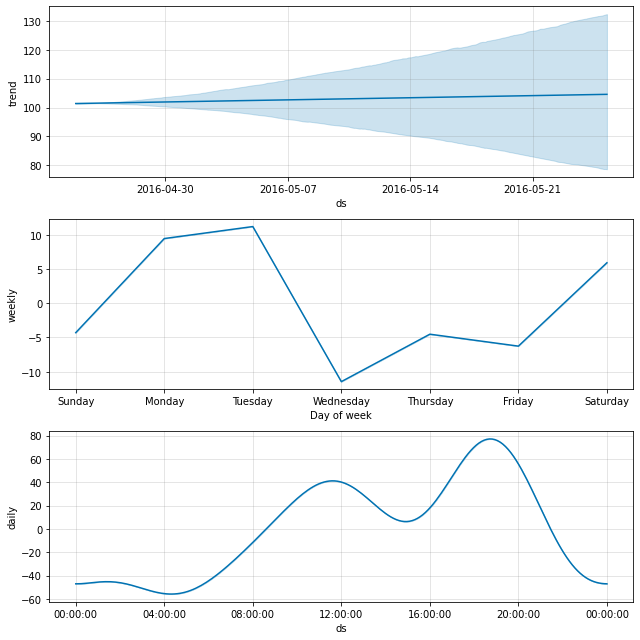

In [13]:
fig2 = fbp.plot_components(forecast)

In [0]:
forecast[['ds','yhat']]

y_pred = forecast['yhat'].astype('int64')
output = pd.DataFrame({'id': test_df.id,
                       'WattHour': y_pred})
output.to_csv('submission.csv', index=False)
from google.colab import files
files.download('submission.csv')